# Voila and matplotlib tests

Based largely on [here](https://github.com/voila-dashboards/voila/pull/170)
trying to answer question [here](https://stackoverflow.com/questions/59836124/plot-pandas-dataframe-in-jupyter-with-voila)

The essential trick is to use `%matplotlib widget` at the top of a cell as close to the top of your notebook as possible. It can be just that special invocation in a cell, too. **I have added `%matplotlib widget` to most cells here only just because it makes copying to use elsewhere easier.** You only need to invoke it once.

There is a Pandas dataframe plot example included on [this page](basics.ipynb). (As documented [here](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html) and stated [here](http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/understand-df-plot-in-pandas/) as, "Under the hood, pandas plots graphs with the matplotlib library.")

A couple of things to notice when dealing with the notebook and the Voila app rendering of matplotlib plots:

- **DON'T PANIC IF YOU DON'T SEE OUTPUT OF THE PLOTS IN THE VOILA APP INSTANTANEOUS!!!!!**  
    Those that use the Canvas to render can take a few seconds to load, most likely due to loading of the additional javascript supporting the view interface.

- Yo'll notice the typical use of `plt.show()` isn't featured. If you just use the typical `plt.show()`, you'll see the output in the notebook only. You need `%matplotlib widget` somewhere at the top of your notebook to get it to also be seen in the Voila app as discussed above.

I have tried to demonstrate approaches that have the matplotlib plots display in both the notebook and the Voila app. This is why you won't see the tpyical `plt.show()` featured here. However, if you pay close attention you'll notice the different approaches can produce slightly renderings/feature sets. This dichotomy becomes more apparent in the Voila app as you'll notice the top images load faster than those being rendered within the Canvas. This dichotomy also becomes readily apparent when you re-open a saved notebook. The later cells won't be rendered in the notebook view upon re-opening. The earlier cells will be shown as the image itself gets stored as part of the notebook (encoded as Base64). This extends to when you view the notebooks statically on GitHub or via [nbviewer](https://nbviewer.jupyter.org/). So for your actual plots and use cases you may want to test and see which you style prefer or suit your needs.


Also **it is best to avoid `ipympl`** use unless you only plan to have one plot in your notebook or Voila app. I show ways around that here; however, easiest not to use ipympl.    
I SHOULD ADD MORE THAT USE PLAIN MATPLOTLIB OR SEABORN, too.

## Example plots

Note this first cell essentially is repeated again at the bottom. Towards the top of the notebook, I wanted to feature the fast-loading, non-canvas view. You'll notice when it is run later in the notebook, it needs nothing extra to make it work but the later one has the Canvas interface and loads slower. Also note the later one isn't viewed when re-opening the notebook until the code is run. This view in the first cells is rendered when the notebook is open and 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

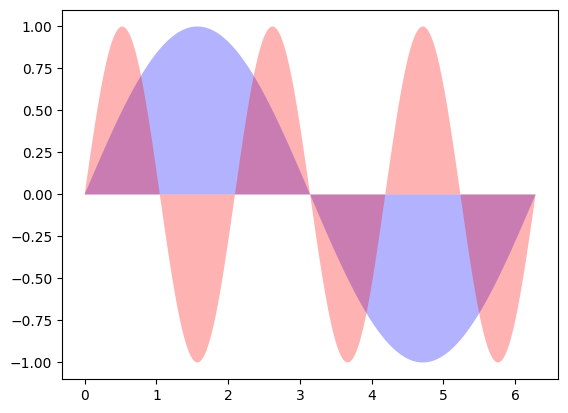

In [1]:
%matplotlib widget
import ipympl
import matplotlib

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 500)
y1 = np.sin(x)
y2 = np.sin(3 * x)

fig, ax = plt.subplots()
ax.fill(x, y1, 'b', x, y2, 'r', alpha=0.3)
#plt.show()
ax.figure

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

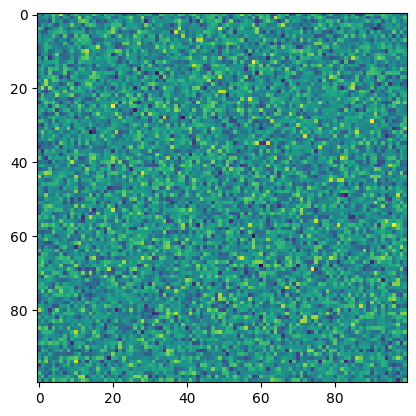

In [2]:
%matplotlib widget
import matplotlib.pyplot
import matplotlib.pyplot as plt
import numpy as np
fig = matplotlib.pyplot.figure()
a = matplotlib.pyplot.imshow(np.random.randn(100, 100))
a.figure

This next one is a bit flakey. You'll see if you run it again, you'll also get the canvas-style output(?). 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

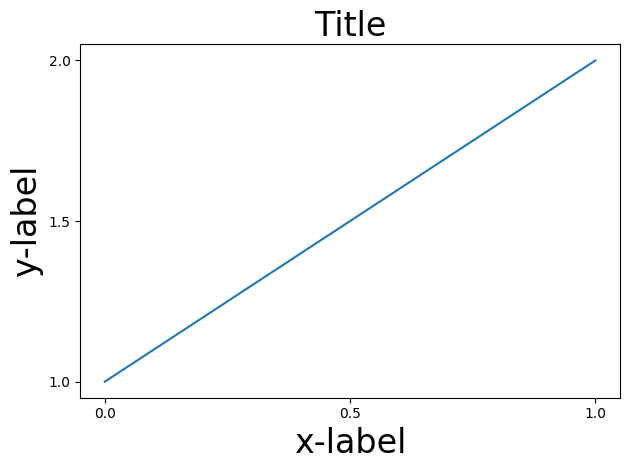

In [3]:
%matplotlib widget
import ipympl
import matplotlib.pyplot as plt
# NOTE THAT WITH `%matplotlib widget` it seems this WILL NOT SHOW in notebook but DOES SHOW IN VOILA
# example from https://matplotlib.org/users/tight_layout_guide.html#tight-layout-guide
def example_plot(ax, fontsize=12):
     ax.plot([1, 2])
     ax.locator_params(nbins=3)
     ax.set_xlabel('x-label', fontsize=fontsize)
     ax.set_ylabel('y-label', fontsize=fontsize)
     ax.set_title('Title', fontsize=fontsize)

plt.close('all')
fig, ax = plt.subplots()
example_plot(ax, fontsize=24)
plt.tight_layout()
ax.figure

(The other odd thing about that above plot I found was if I take that exact code, except for the last line, and put in a fresh notebook, it works in both the notebook and Voila app. But if you put it twice, only the second one is shown. Maybe because the `i` stands for interactive and it gets written over and the interface moved to the next cell that also uses `ipympl`? A: Yes, that is what happens. But this solution gets around it so you can have multiple `ipympl` plots in a notebook and Voila app. This also pertains to the first and last cell and explains why behaved weird in first tests.)

Starting below here. The slow-rendering 'Canvas' style is featured.

In [4]:
%matplotlib widget
import ipympl
import matplotlib.pyplot as plt
# NOTE THAT WITH `%matplotlib widget` it seems this WILL NOT SHOW in notebook but DOES SHOW IN VOILA
# example from https://matplotlib.org/users/tight_layout_guide.html#tight-layout-guide
def example_plot(ax, fontsize=12):
     ax.plot([1, 2])
     ax.locator_params(nbins=3)
     ax.set_xlabel('x-label', fontsize=fontsize)
     ax.set_ylabel('y-label', fontsize=fontsize)
     ax.set_title('Title', fontsize=fontsize)

plt.close('all')
fig, ax = plt.subplots()
example_plot(ax, fontsize=24)
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [5]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, axes = plt.subplots(ncols=2, nrows=2)
ax1, ax2, ax3, ax4 = axes.ravel()

# scatter plot (Note: `plt.scatter` doesn't use default colors)
x, y = np.random.normal(size=(2, 200))
ax1.plot(x, y, 'o')

# sinusoidal lines with colors from default color cycle
L = 2*np.pi
x = np.linspace(0, L)
ncolors = len(plt.rcParams['axes.prop_cycle'])
shift = np.linspace(0, L, ncolors, endpoint=False)
for s in shift:
    ax2.plot(x, np.sin(x + s), '-')
ax2.margins(0)

# bar graphs
x = np.arange(5)
y1, y2 = np.random.randint(1, 25, size=(2, 5))
width = 0.25
ax3.bar(x, y1, width)
ax3.bar(x + width, y2, width,
        color=list(plt.rcParams['axes.prop_cycle'])[2]['color'])
ax3.set_xticks(x + width)
ax3.set_xticklabels(['a', 'b', 'c', 'd', 'e'])

# circles with colors from default color cycle
for i, color in enumerate(plt.rcParams['axes.prop_cycle']):
    xy = np.random.normal(size=2)
    ax4.add_patch(plt.Circle(xy, radius=0.3, color=color['color']))
ax4.axis('equal')
ax4.margins(0)
#plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

This next cell produces a 'canvas' style view of the same plot as in the first code cell in this notebook. Note the differences in time to display in the Voila app view and the fact it won't display when you re-open this notebook until you run the code again.

Also note this one has buttons that allow additional abilities that the first cell doesn't display.

In [6]:
import ipympl

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 500)
y1 = np.sin(x)
y2 = np.sin(3 * x)

fig, ax = plt.subplots()
ax.fill(x, y1, 'b', x, y2, 'r', alpha=0.3);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …